In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/image/__init__.py)

In [ ]:

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="D:\\Image-intern\\blood_image\\traine",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="D:\\Image-intern\\blood_image\\teste", target_size=(224,224))

Found 38 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="sigmoid"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
hist = model.fit(traindata, validation_data= testdata,epochs=30)


Epoch 1/30
2/2 [==============================] - 11s 5s/step - loss: 0.6920 - accuracy: 0.5263 - val_loss: 0.7536 - val_accuracy: 0.2131
Epoch 2/30
2/2 [==============================] - 10s 5s/step - loss: 0.6928 - accuracy: 0.5263 - val_loss: 0.7688 - val_accuracy: 0.2131
Epoch 3/30
2/2 [==============================] - 22s 11s/step - loss: 0.6956 - accuracy: 0.5263 - val_loss: 0.7936 - val_accuracy: 0.2131
Epoch 4/30
2/2 [==============================] - 10s 5s/step - loss: 0.6955 - accuracy: 0.5263 - val_loss: 0.7783 - val_accuracy: 0.2131
Epoch 5/30
2/2 [==============================] - 10s 5s/step - loss: 0.6935 - accuracy: 0.5263 - val_loss: 0.7523 - val_accuracy: 0.2131
Epoch 6/30
2/2 [==============================] - 10s 5s/step - loss: 0.6922 - accuracy: 0.5263 - val_loss: 0.7311 - val_accuracy: 0.2131
Epoch 7/30
2/2 [==============================] - 11s 6s/step - loss: 0.6906 - accuracy: 0.5263 - val_loss: 0.7048 - val_accuracy: 0.2131
Epoch 8/30
2/2 [=================

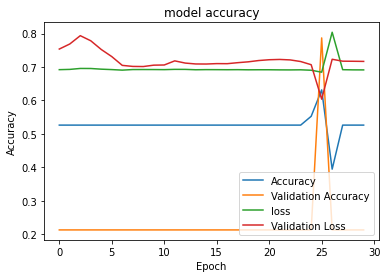

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

neutrophil


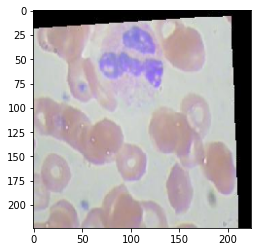

In [ ]:
from keras.preprocessing import image
img = image.load_img("D:\\Image-intern\\SPT\\dataset2-master\\dataset2-master\\images\\TRAIN\\NEUTROPHIL\\_15_9335.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
if output[0][0] > output[0][1]:
    print("neutrophil")
else:
    print('eosinophil')